# Fake and Real News Classification

This jupyter notebook focuses on building and evaluating an NLP model to classify news articles as either real or fake.

## Data Cleaning and Preprocessing

In [1]:
import time

# Start the timer
start_time = time.time()

In [2]:
# Let's first set up Kaggle and download the dataset we will be working with:

from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

dataset_name = "clmentbisaillon/fake-and-real-news-dataset"
download_path = "./" 
api.dataset_download_files(dataset_name, path=download_path, unzip=True)

print("Dataset downloaded successfully")


Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
Dataset downloaded successfully


In [3]:
# Load the dataset and inspect its structure

import pandas as pd
import matplotlib.pyplot as plt

real_df = pd.read_csv('./True.csv') 
fake_df = pd.read_csv('./Fake.csv') 

print("Real News Dataset:")
real_df

Real News Dataset:


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
print("Fake News Dataset:")
fake_df

Fake News Dataset:


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [5]:
print(real_df['subject'].value_counts())

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64


In [6]:
print(fake_df['subject'].value_counts())

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64


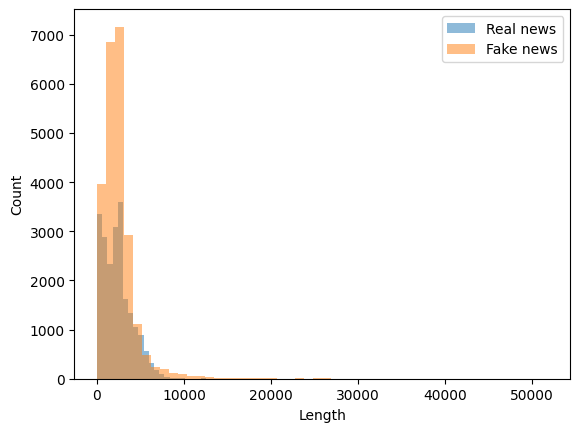

In [7]:
# check length of news article

real_length = real_df['text'].apply(len)
fake_length = fake_df['text'].apply(len)

plt.hist(real_length, bins=50, alpha=0.5, label='Real news')
plt.hist(fake_length, bins=50, alpha=0.5, label='Fake news')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

In [8]:
fake_df.duplicated().sum(), real_df.duplicated().sum()

(3, 206)

In [9]:
real_df.drop_duplicates(inplace=True)
fake_df.drop_duplicates(inplace=True)

In [10]:
#Label the data, combine them to a unique data frame and shuffle it

real_df['label'] = 1
fake_df['label'] = 0

news_df = pd.concat([real_df, fake_df], ignore_index=True)

news_df = news_df.sample(frac=1).reset_index(drop=True)

news_df

,title,text,subject,date,label
0,Mueller’s Latest Request In Russia Investigat...,Special Counsel Robert Mueller has just droppe...,News,"September 21, 2017",0
1,WATCH: Hillary Smacks Trump With His Own Word...,Donald Trump has made a lot of offensive state...,News,"May 27, 2016",0
2,Indonesian police kill two 'terrorists' on eas...,JAKARTA (Reuters) - Indonesian counter-terrori...,worldnews,"October 31, 2017",1
3,NEWSFLASH FOR OUR IMPERIAL PRESIDENT: STATES C...,As Barack Hussein Obama tours around the count...,politics,"Jul 23, 2015",0
4,NO JOKE! THE LYIN’ HILLARY DOLL IS HERE!…18 Li...,HERE S SOMEONE GOING THROUGH ALL 18 LIES WOW!,politics,"Oct 6, 2016",0
...,...,...,...,...,...
44684,[VIDEO] ANN ROMNEY WON’T SAY WHO SHE SUPPORTS ...,I think we can all agree that America believes...,politics,"Sep 29, 2015",0
44685,Trump national security aide Flynn resigns ove...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"February 13, 2017",1
44686,War-scarred neighborhoods in Ukraine's rebel-h...,"DONETSK, Ukraine (Reuters) - Ruined houses, sh...",worldnews,"December 12, 2017",1
44687,Trump Just Accidentally Admitted Climate Chan...,Somebody must have put some truth serum in Lit...,News,"September 7, 2017",0


In [11]:
# Check for missing values 
news_df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

label
0    23478
1    21211
Name: count, dtype: int64


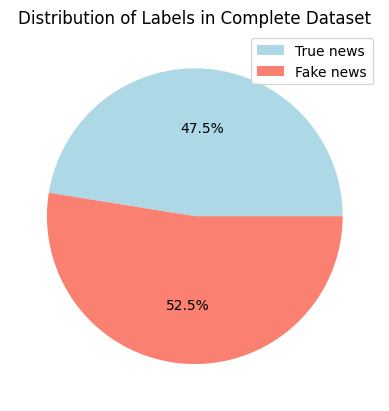

In [12]:
from matplotlib.pyplot import pie, title, show, legend 

class_counts = news_df['label'].value_counts()
print(class_counts)

pie([news_df.label.value_counts().values[1],
     news_df.label.value_counts().values[0]],
    autopct='%1.1f%%',
    colors=['lightblue','salmon'])
legend(['True news','Fake news'])
title('Distribution of Labels in Complete Dataset')
show()

In [13]:
# Import the necessary libraries to do some text preprocessing to prepare the data for NLP tasks

import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/pamela/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/pamela/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# Stop words removal and lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Lowercase
    return text

def preprocess_text(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)


news_df['clean_text'] = news_df['text'].apply(clean_text)
news_df['processed_text'] = news_df['clean_text'].apply(preprocess_text)

In [15]:
# Processed text
news_df[['text', 'clean_text', 'processed_text', 'label']].head()

,text,clean_text,processed_text,label
0,Special Counsel Robert Mueller has just droppe...,special counsel robert mueller has just droppe...,special counsel robert mueller dropped yet ano...,0
1,Donald Trump has made a lot of offensive state...,donald trump has made a lot of offensive state...,donald trump made lot offensive statement year...,0
2,JAKARTA (Reuters) - Indonesian counter-terrori...,jakarta reuters indonesian counterterrorism p...,jakarta reuters indonesian counterterrorism po...,1
3,As Barack Hussein Obama tours around the count...,as barack hussein obama tours around the count...,barack hussein obama tour around country tryin...,0
4,HERE S SOMEONE GOING THROUGH ALL 18 LIES WOW!,here s someone going through all lies wow,someone going lie wow,0


## Text Analysis and Feature Extraction

Most Common Words in Real News:
said: 97844
trump: 53754
u: 40693
state: 35965
would: 31164
reuters: 28110
president: 26707
republican: 21975
government: 19171
year: 19052


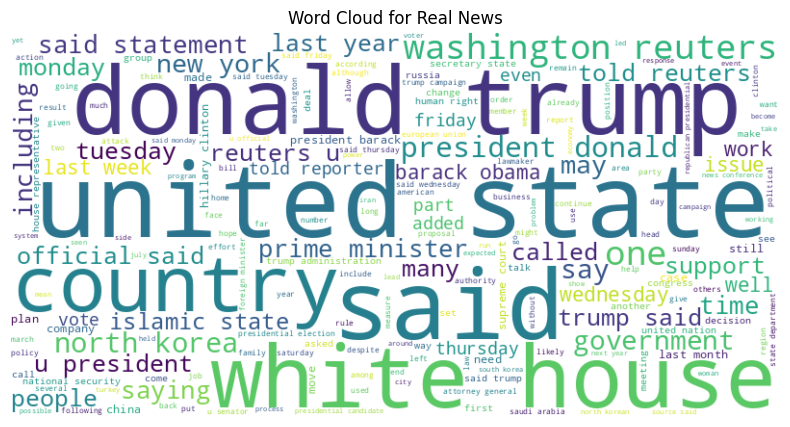

Most Common Words in Fake News:
trump: 74263
said: 31012
president: 26165
people: 26053
one: 23749
would: 23426
u: 22353
state: 21996
clinton: 18644
like: 18163


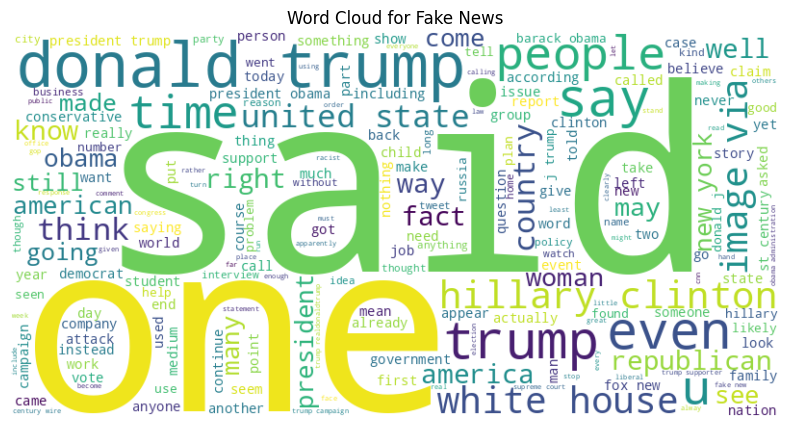

In [16]:
# We can use Word Clouds to explore text data patterns

from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Split the processed dataset into real (l) and fake news (0)
real_news = news_df[news_df['label'] == 1]['processed_text']
fake_news = news_df[news_df['label'] == 0]['processed_text']

def analyze_text_data(text_data, label):
    
    tokens = []
    for text in text_data:
        tokens.extend(word_tokenize(text))

    # Word Frequency 
    word_freq = Counter(tokens)
    most_common_words = word_freq.most_common(10)
    print(f"Most Common Words in {label} News:")
    for word, freq in most_common_words:
        print(f"{word}: {freq}")
    
    # Word Cloud 
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_data))
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {label} News')
    plt.axis('off')
    plt.show()

analyze_text_data(real_news, 'Real')
analyze_text_data(fake_news, 'Fake')


In [17]:
# TF-IDF vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')  # top 1000 words
tfidf_matrix = tfidf_vectorizer.fit_transform(news_df['processed_text'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df.head()

,ability,able,abortion,absolutely,access,according,account,accusation,accused,act,...,worker,working,world,wrong,wrote,year,yearold,yes,york,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.031663,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.059217,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.06833,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.017321,0.0,0.0,0.083549,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


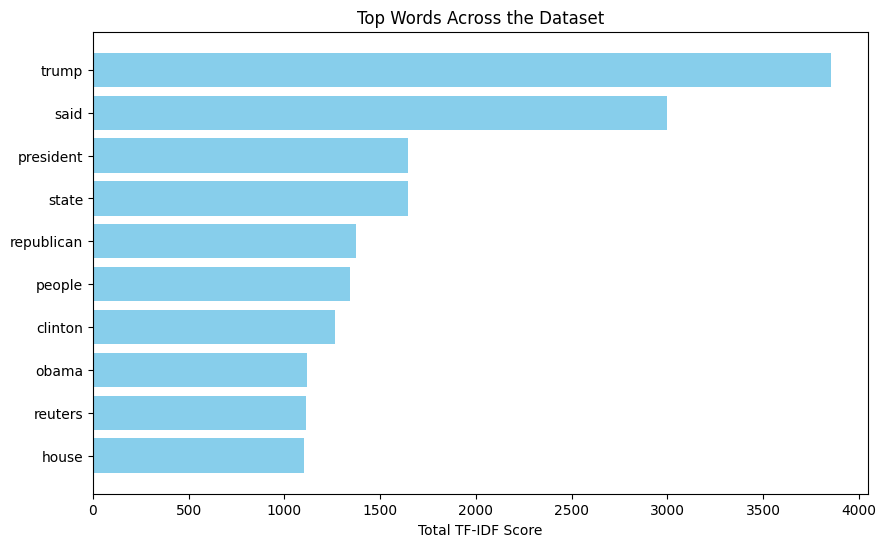

In [18]:
# Sum the TF-IDF scores for each word to find top words across the dataset

total_scores = tfidf_matrix.sum(axis=0).A1
words = tfidf_vectorizer.get_feature_names_out()

tfidf_summary_df = pd.DataFrame({'word': words, 'score': total_scores})
tfidf_summary_df = tfidf_summary_df.sort_values(by='score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(tfidf_summary_df['word'], tfidf_summary_df['score'], color='skyblue')
plt.xlabel('Total TF-IDF Score')
plt.title('Top Words Across the Dataset')
plt.gca().invert_yaxis() 
plt.show()

## Predictive Modeling with NLP

In [19]:
from sklearn.model_selection import train_test_split

# we will split the data into 70% training, 15% testing and 15% validation 
X_train, X_temp, y_train, y_temp = train_test_split(tfidf_matrix, news_df['label'], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (31282, 1000)
Validation set size: (6703, 1000)
Test set size: (6704, 1000)


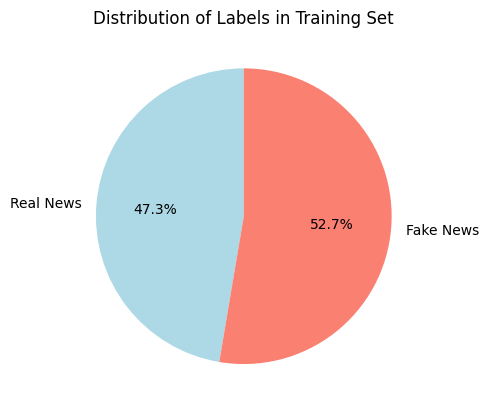

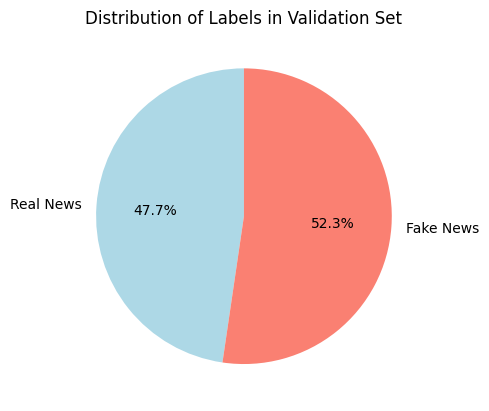

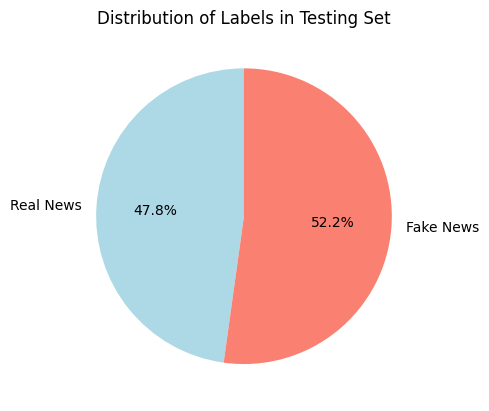

In [20]:
# Pie Chart for label distribution for each set

def label_distribution(y_data, set_name):
    label_counts = y_data.value_counts()
    labels = ['Real News', 'Fake News']
    sizes = [label_counts[1], label_counts[0]] 
    
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
    plt.title(f'Distribution of Labels in {set_name} Set')
    plt.show()

label_distribution(y_train, 'Training')
label_distribution(y_val, 'Validation')
label_distribution(y_test, 'Testing')


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import seaborn as sns

#Logistic Regression model
log_regression = LogisticRegression(max_iter=1000)

# Train the model
log_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
# Predict on validation set
y_val_pred = log_regression.predict(X_val)

In [23]:
# Evaluate the model
accuracy_complete_model = accuracy_score(y_val, y_val_pred)
report = classification_report(y_val, y_val_pred)


print(f"Accuracy: {accuracy_complete_model}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9832910637028196
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3507
           1       0.98      0.98      0.98      3196

    accuracy                           0.98      6703
   macro avg       0.98      0.98      0.98      6703
weighted avg       0.98      0.98      0.98      6703



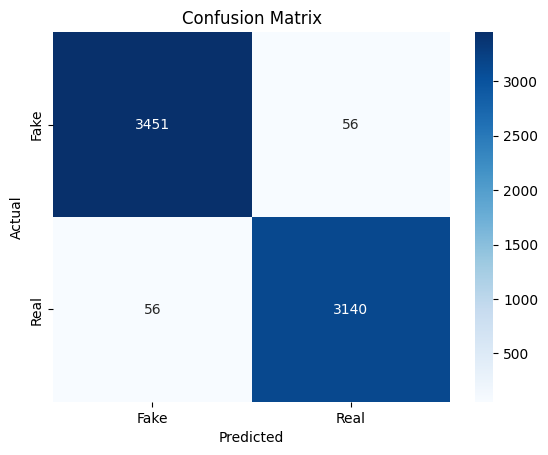

In [24]:
#Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

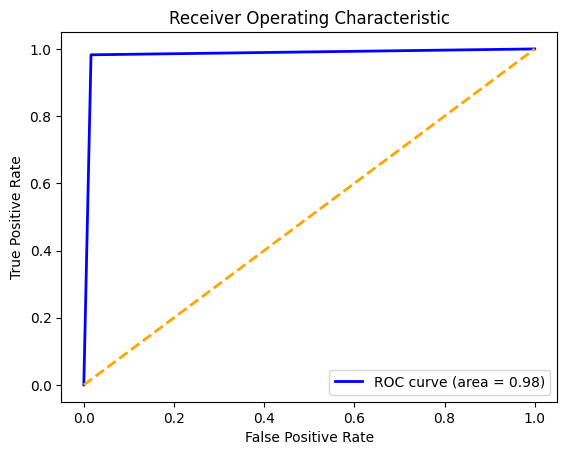

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)
roc_auc = auc(fpr, tpr)

# Plot 
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [26]:
# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

hyperparameters = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2'],
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l2']})

In [27]:
# Display best hyperparameters and test accuracy
print('Best hyperparameters:', grid_search.best_params_)
print('Test accuracy:', grid_search.score(X_test, y_test)) 

Best hyperparameters: {'C': 100, 'penalty': 'l2'}
Test accuracy: 0.9883651551312649


In [28]:
# Retrain the model and evaluation
log_regression_best = grid_search.best_estimator_
y_val_pred_best = log_regression_best.predict(X_val)

print(classification_report(y_val, y_val_pred_best))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3507
           1       0.99      0.99      0.99      3196

    accuracy                           0.99      6703
   macro avg       0.99      0.99      0.99      6703
weighted avg       0.99      0.99      0.99      6703



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3499
           1       0.99      0.99      0.99      3205

    accuracy                           0.99      6704
   macro avg       0.99      0.99      0.99      6704
weighted avg       0.99      0.99      0.99      6704

Confusion Matrix:


<Axes: >

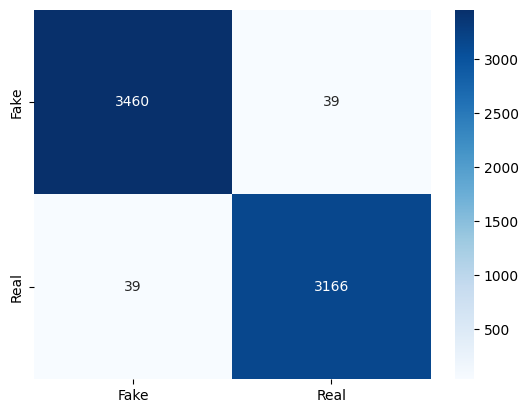

In [29]:
# Final evaluation with test set

y_test_pred = log_regression_best.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix:")
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])

## Model Interpretation

In [35]:
# Top 10 positive and negative coefficient

import numpy as np

# Extract feature names and coefficients
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = log_regression_best.coef_[0]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort and get top features
top_positive = importance_df.sort_values(by='Coefficient', ascending=False).head(10)
top_negative = importance_df.sort_values(by='Coefficient', ascending=True).head(15)

print("Top Positive Features (real news):")
print(top_positive)

print("\nTop Negative Features (fake news):")
print(top_negative)


Top Positive Features (real news):
        Feature  Coefficient
765     reuters   113.475845
263        dont    20.998708
785        said    20.966811
604      obamas    17.042770
598         nov    15.749589
970  washington    15.645820
931     tuesday    14.447488
341      friday    13.362500
512      london    12.519409
976   wednesday    12.046333

Top Negative Features (fake news):
       Feature  Coefficient
406      image   -28.014166
363        gop   -20.761252
745        rep   -16.505437
985       wire   -15.829524
390    hillary   -13.934852
221      daily   -13.551491
575         mr   -12.540088
718       read   -12.511056
571    morning   -11.651791
282     entire   -11.345855
43    american   -10.810423
890   taxpayer   -10.581858
45   announced   -10.493354
971      watch   -10.410074
104  breitbart    -9.953505


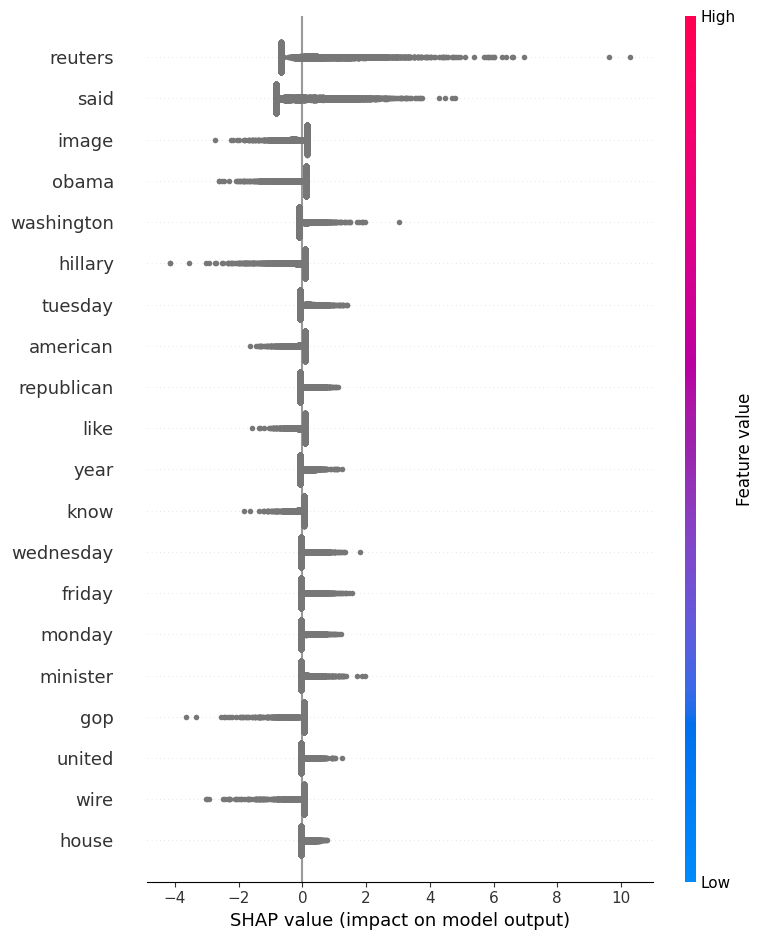

In [31]:
# Shap for more detailed explanations of individual predictions

import shap

explainer = shap.Explainer(log_regression, X_train)
shap_values = explainer(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test, feature_names)

In [32]:
# Work with subgroups to check for bias

subgroups = news_df['subject'].unique() 

for subgroup in subgroups:
    
    subgroup_indices = news_df[news_df['subject'] != subgroup].index

    
    valid_subgroup_indices = np.intersect1d(subgroup_indices, np.arange(X_test.shape[0]))  
   
    X_test_subgroup = X_test[valid_subgroup_indices]  
    y_test_subgroup = y_test.iloc[valid_subgroup_indices]  

    y_pred_subgroup = log_regression_best.predict(X_test_subgroup)
    
    accuracy_subgroup = accuracy_score(y_test_subgroup, y_pred_subgroup)
    report_subgroup = classification_report(y_test_subgroup, y_pred_subgroup)

    # Output the results
    print(f"\nAccuracy for {subgroup} subgroup: {accuracy_subgroup}")
    print(f"Classification Report for {subgroup} subgroup:\n{report_subgroup}")

print(f"\nAccuracy for complete model: {accuracy_complete_model}")


Accuracy for News subgroup: 0.9877186453293636
Classification Report for News subgroup:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2770
           1       0.99      0.99      0.99      2604

    accuracy                           0.99      5374
   macro avg       0.99      0.99      0.99      5374
weighted avg       0.99      0.99      0.99      5374


Accuracy for worldnews subgroup: 0.9880424300867888
Classification Report for worldnews subgroup:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2738
           1       0.99      0.99      0.99      2447

    accuracy                           0.99      5185
   macro avg       0.99      0.99      0.99      5185
weighted avg       0.99      0.99      0.99      5185


Accuracy for politics subgroup: 0.9885502906464682
Classification Report for politics subgroup:
              precision    recall  f1-score   support

      

In [33]:
# Feature perturbation
features_to_perturb = ['reuters', 'obama']

for feature in features_to_perturb:
    feature_idx = list(feature_names).index(feature)
    X_test_mod = X_test.copy()
    X_test_mod.data[X_test_mod.indices == feature_idx] *= 0.5  # Scale down contribution

    y_pred_mod = log_regression_best.predict(X_test_mod)
    accuracy_mod = accuracy_score(y_test, y_pred_mod)
    print(f"Accuracy after perturbing '{feature}': {accuracy_mod}")

Accuracy after perturbing 'reuters': 0.9798627684964201
Accuracy after perturbing 'obama': 0.9885143198090692


In [34]:
end_time = time.time()

# Print the elapsed time
print(f"Elapsed time: {end_time - start_time} seconds")

Elapsed time: 208.99017596244812 seconds
